# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [11]:
import sys, platform
print("Python:", sys.version)
print("Platform:", platform.platform())
print("Executable:", sys.executable)

Python: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]
Platform: Windows-11-10.0.26100-SP0
Executable: d:\Kuliah\Semester 5\Membangung Sistem Machine Learning\SMSML_Muhammad-Adil-Imamul-Haq-Mubarak\Eksperimen_SML_Muhammad-Adil-Imamul-Haq-Mubarak\.venv\Scripts\python.exe


In [12]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [13]:
DATA_PATH = os.path.join("..", "Heart_Desease_raw", "heart_desease_data.csv")
df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())
display(df.tail())


Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
display(df.info())
display(df.describe(include="all").T)

print("\nMissing values per column:")
display(df.isna().sum().sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2



Missing values per column:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
candidate_targets = ["target", "label", "class", "output", "diagnosis", "y"]
target_col = None

for c in candidate_targets:
    if c in df.columns:
        target_col = c
        break

print("Detected target_col:", target_col)
print("All columns:", list(df.columns))


Detected target_col: target
All columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Target value counts:


target
1    165
0    138
Name: count, dtype: int64

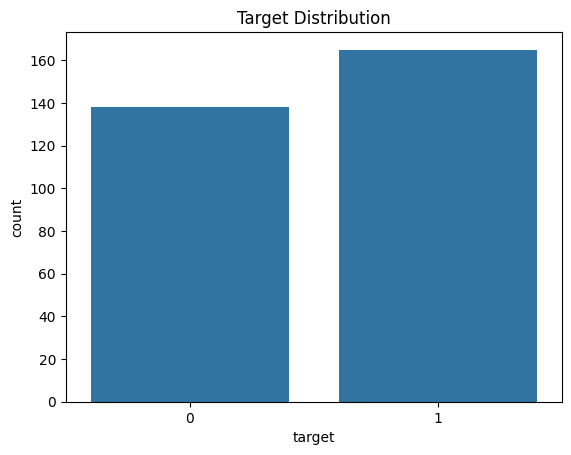

In [16]:
assert target_col is not None, "Target column belum terdeteksi. Set manual target_col dulu."

print("Target value counts:")
display(df[target_col].value_counts(dropna=False))

plt.figure()
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution")
plt.show()


Numeric columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Categorical columns: []


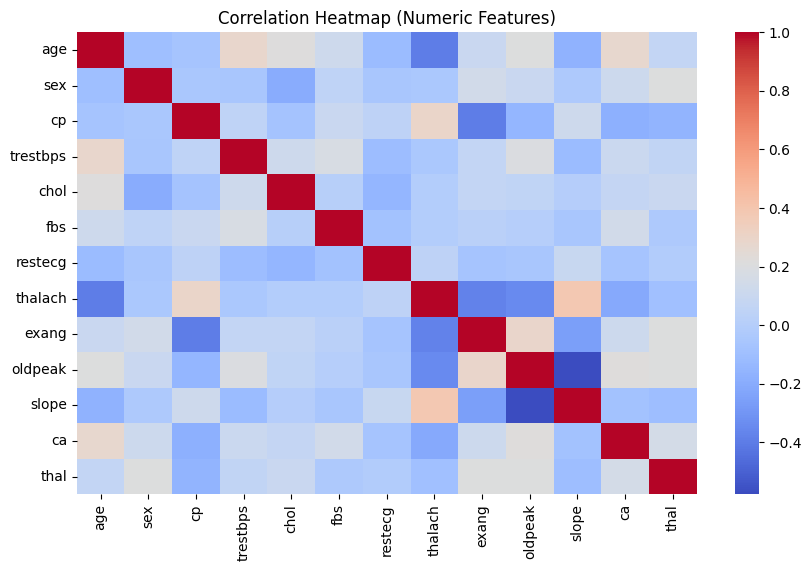

In [17]:
feature_cols = [c for c in df.columns if c != target_col]

num_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

if len(num_cols) > 1:
    plt.figure(figsize=(10, 6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=False, cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()


In [18]:
X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y if y.nunique() <= 20 else None
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))


Train shape: (242, 13) Test shape: (61, 13)
Train target distribution:
 target
1    0.545455
0    0.454545
Name: proportion, dtype: float64
Test target distribution:
 target
1    0.540984
0    0.459016
Name: proportion, dtype: float64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ],
    remainder="drop"
)

# Fit hanya di train
preprocessor.fit(X_train)

X_train_processed = preprocessor.transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

print("Processed train shape:", X_train_processed.shape)
print("Processed test shape :", X_test_processed.shape)


Processed train shape: (242, 13)
Processed test shape : (61, 13)


In [20]:
from pathlib import Path
from scipy import sparse

def to_dense_if_needed(X):
    if sparse.issparse(X):
        return X.toarray()
    return X

X_train_dense = to_dense_if_needed(X_train_processed)
X_test_dense  = to_dense_if_needed(X_test_processed)

out_num_cols = num_cols
out_cat_cols = []

if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    out_cat_cols = ohe.get_feature_names_out(cat_cols).tolist()

out_cols = out_num_cols + out_cat_cols

train_df = pd.DataFrame(X_train_dense, columns=out_cols)
test_df  = pd.DataFrame(X_test_dense, columns=out_cols)

train_df[target_col] = y_train.values
test_df[target_col]  = y_test.values

BASE_DIR = Path.cwd()
OUT_DIR = BASE_DIR / "Heart_Disease_preprocessing"
OUT_DIR.mkdir(parents=True, exist_ok=True)

train_path = OUT_DIR / "train_processed.csv"
test_path  = OUT_DIR / "test_processed.csv"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print("Saved:", train_path)
print("Saved:", test_path)

display(train_df.head())


Saved: d:\Kuliah\Semester 5\Membangung Sistem Machine Learning\SMSML_Muhammad-Adil-Imamul-Haq-Mubarak\Eksperimen_SML_Muhammad-Adil-Imamul-Haq-Mubarak\preprocessing\Heart_Disease_preprocessing\train_processed.csv
Saved: d:\Kuliah\Semester 5\Membangung Sistem Machine Learning\SMSML_Muhammad-Adil-Imamul-Haq-Mubarak\Eksperimen_SML_Muhammad-Adil-Imamul-Haq-Mubarak\preprocessing\Heart_Disease_preprocessing\test_processed.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1.610480,-1.46385,2.044420,0.461840,-0.123235,-0.404304,0.857493,0.039942,-0.715891,0.604853,0.948185,1.207034,-0.561223,1
1,1.282051,0.68313,0.057474,1.575595,0.023366,-0.404304,0.857493,-1.373486,1.396861,-0.890458,-0.667736,2.167896,-2.217514,0
2,0.077810,-1.46385,-0.936000,-0.206413,-0.835301,-0.404304,2.743977,-0.917541,1.396861,0.770998,-0.667736,0.246171,1.095069,0
3,0.296763,0.68313,-0.936000,-1.208792,1.887302,-0.404304,0.857493,-0.324813,1.396861,1.601727,-0.667736,0.246171,1.095069,0
4,1.829433,-1.46385,1.050947,-1.208792,0.421285,2.473388,-1.028992,-0.917541,-0.715891,-0.890458,0.948185,0.246171,-0.561223,1
